In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage


In [4]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


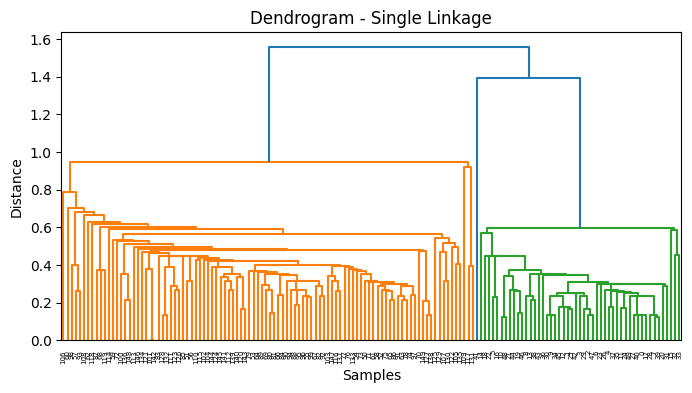

In [5]:
plt.figure(figsize=(8,4))
dendrogram(linkage(X_scaled, method='single'))
plt.title("Dendrogram - Single Linkage")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.savefig("dendrogram_single.png")
plt.show()


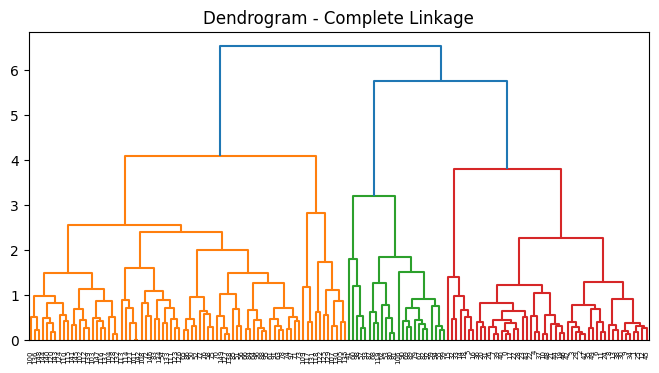

In [6]:
plt.figure(figsize=(8,4))
dendrogram(linkage(X_scaled, method='complete'))
plt.title("Dendrogram - Complete Linkage")
plt.savefig("dendrogram_complete.png")
plt.show()


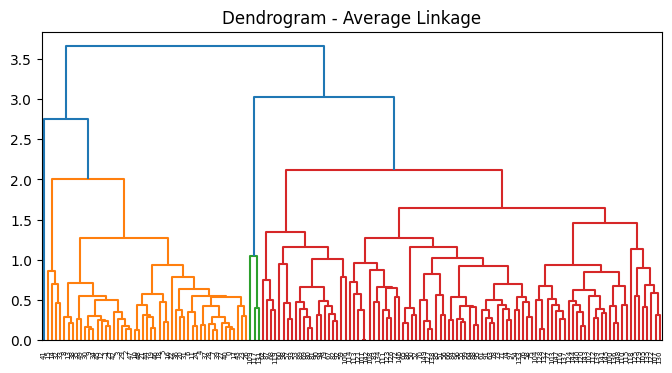

In [7]:
plt.figure(figsize=(8,4))
dendrogram(linkage(X_scaled, method='average'))
plt.title("Dendrogram - Average Linkage")
plt.savefig("dendrogram_average.png")
plt.show()


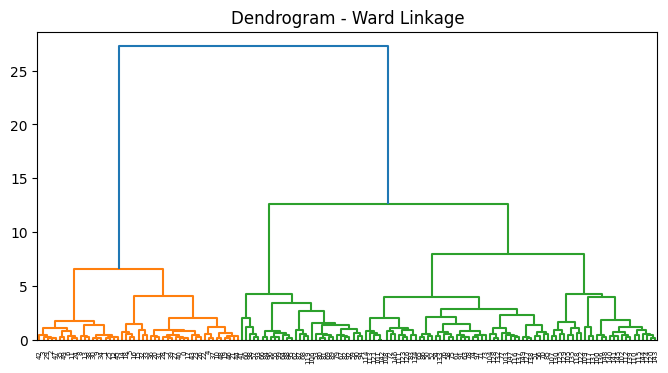

In [8]:
plt.figure(figsize=(8,4))
dendrogram(linkage(X_scaled, method='ward'))
plt.title("Dendrogram - Ward Linkage")
plt.savefig("dendrogram_ward.png")
plt.show()


In [9]:
models = ['single','complete','average','ward']

scores = {}

for method in models:
    model = AgglomerativeClustering(n_clusters=3, linkage=method)
    labels = model.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    scores[method] = score
    print(method, "Silhouette Score:", score)


single Silhouette Score: 0.504645610832545
complete Silhouette Score: 0.44961848359884726
average Silhouette Score: 0.4802669329728697
ward Silhouette Score: 0.4466890410285909


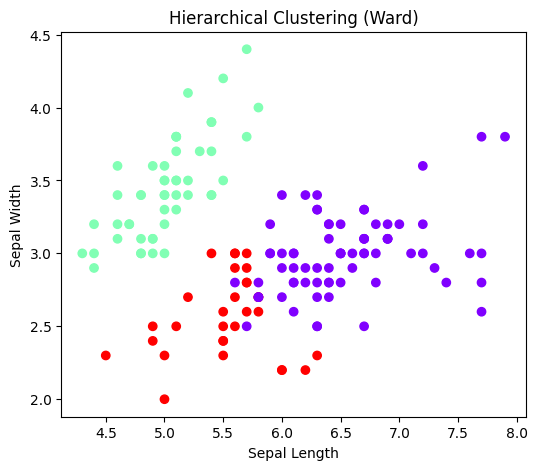

In [10]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = model.fit_predict(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=labels, cmap='rainbow')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Hierarchical Clustering (Ward)")
plt.savefig("clusters_ward.png")
plt.show()
